In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [7]:
def rargmax(vector) :
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

In [4]:
register(
    id ='FrozenLake-v3' , 
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4' , 'is_slippery' : False}
)
env = gym.make('FrozenLake-v3') 

In [5]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

num_episodes = 2000

In [9]:
rList = []

for i in range(num_episodes) :
    state = env.reset()
    rAll = 0
    done = False
    
    while not done :
        action = rargmax(Q[state, :])
        new_state , reward , done , _ = env.step(action)
        
        Q[state, action] = reward + np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
    rList.append(rAll)    

Succes rate : 0.914
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


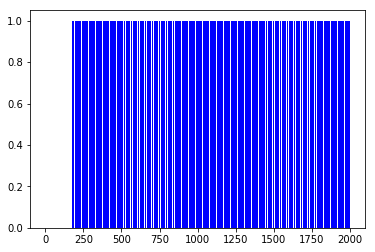

In [11]:
print("Succes rate : " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList , color = 'blue')
plt.show()